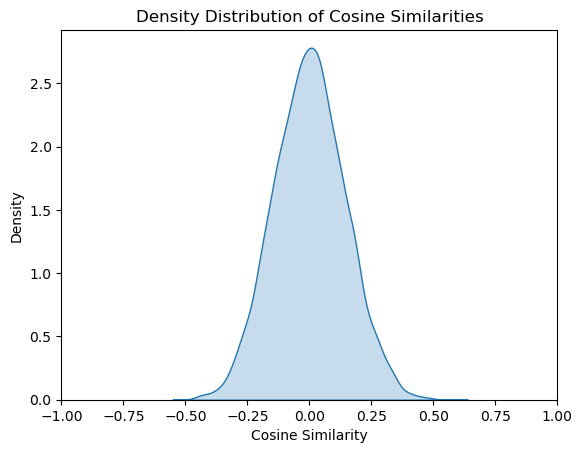

In [1]:
import torch
import torch.nn.functional as F
import seaborn as sns
import matplotlib.pyplot as plt

# 生成矩阵A，大小为1x768
A = torch.randn(1, 48)

# 随机生成10000个矩阵，大小为10000x768
matrices = torch.randn(10000, 48)

# 计算矩阵A与其他10000个矩阵的余弦相似度
similarities = F.cosine_similarity(A, matrices, dim=1)

# 将余弦相似度转换为Python列表
similarities_list = similarities.tolist()

# 使用seaborn绘制密度分布图
sns.kdeplot(similarities_list, fill=True)

# 设置图表标题和轴标签
plt.title('Density Distribution of Cosine Similarities')
plt.xlim((-1,1))
plt.xlabel('Cosine Similarity')
plt.ylabel('Density')

# 显示图表
plt.show()


In [14]:
torch.randn(100,*A.size()).shape

torch.Size([100, 1, 48])

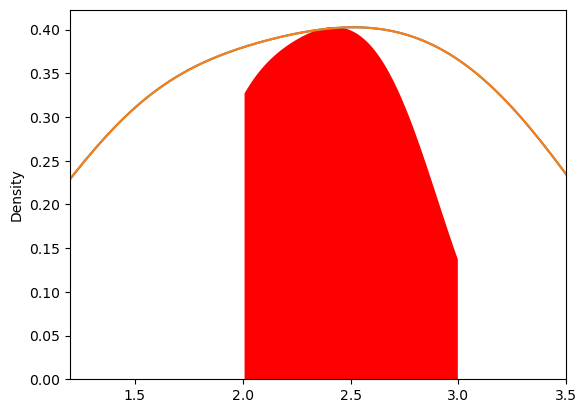

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 假设有一组数据data
data = np.array([1.2, 1.5, 1.7, 2.0, 2.3, 2.5, 2.7, 3.0, 3.2, 3.5])

# 定义绘图范围
a = 2.0
b = 3.0

# 绘制密度曲线
sns.kdeplot(data)

# 获取当前的坐标轴对象
ax = plt.gca()

# 生成横坐标数组
x = np.linspace(min(data), max(data), 200)

# 绘制范围内的阴影
ax.fill_between(x, 0, sns.kdeplot(data).get_lines()[0].get_data()[1],
                where=(x >= a) & (x <= b), color='r', alpha=1)

# 设置x轴和y轴的范围
ax.set_xlim(min(data), max(data))
ax.set_ylim(0, None)

# 显示图形
plt.show()


array([0.00106529, 0.0012582 , 0.00148197, 0.00174074, 0.00203911,
       0.00238211, 0.00277524, 0.00322448, 0.00373631, 0.00431772,
       0.00497621, 0.00571976, 0.00655687, 0.00749651, 0.00854811,
       0.00972151, 0.01102693, 0.01247491, 0.01407626, 0.01584196,
       0.01778311, 0.01991081, 0.02223608, 0.02476973, 0.02752226,
       0.0305037 , 0.03372354, 0.03719052, 0.04091257, 0.04489658,
       0.04914838, 0.05367249, 0.05847209, 0.06354884, 0.06890279,
       0.07453231, 0.08043399, 0.08660258, 0.09303095, 0.09971008,
       0.10662903, 0.113775  , 0.12113339, 0.12868781, 0.13642023,
       0.14431109, 0.15233943, 0.16048307, 0.16871878, 0.17702249,
       0.18536949, 0.1937347 , 0.20209285, 0.21041876, 0.21868755,
       0.22687495, 0.23495745, 0.24291257, 0.25071911, 0.25835726,
       0.26580888, 0.27305759, 0.28008891, 0.2868904 , 0.29345173,
       0.29976468, 0.30582325, 0.31162354, 0.3171638 , 0.32244433,
       0.32746734, 0.33223689, 0.33675871, 0.34104001, 0.34508

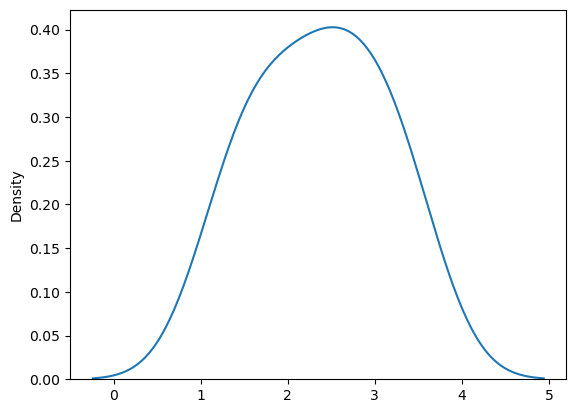

In [99]:
sns.kdeplot(data).get_lines()[0].get_data()[1]

In [15]:
import torch
import torch.nn.functional as F
import seaborn as sns

# 生成矩阵A，大小为1x768
A = torch.randn(1, 48)

# 随机生成10000个矩阵，大小为10000x768
matrices = torch.randn(100000, 48)

# 计算矩阵A与其他10000个矩阵的余弦相似度
similarities = F.cosine_similarity(A, matrices, dim=1)
similarities_max = max(similarities)
similarities_max

tensor(0.5923)

/tmp/ipykernel_55742/184239248.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(matrix_norms_list, shade=True)


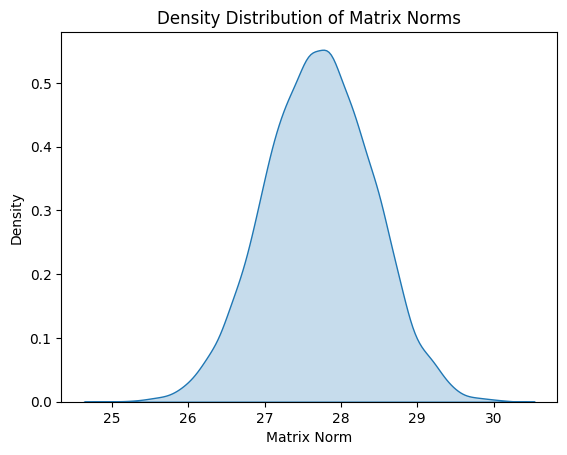

In [4]:
import torch
import seaborn as sns

# 随机生成10000个矩阵，大小为10000x768
matrices = torch.randn(10000, 768)

# 计算每个矩阵的模
matrix_norms = torch.norm(matrices, dim=1)

# 将模转换为Python列表
matrix_norms_list = matrix_norms.tolist()

# 使用seaborn绘制密度分布图
sns.kdeplot(matrix_norms_list, shade=True)

# 设置图表标题和轴标签
plt.title('Density Distribution of Matrix Norms')
plt.xlabel('Matrix Norm')
plt.ylabel('Density')

# 显示图表
plt.show()


In [16]:
import torch

# 生成矩阵A，大小为1x768
A = torch.randn(1, 48)

# 随机生成10000个矩阵，大小为10000x768
matrices = torch.randn(100000, 48)

# 计算矩阵A与其他10000个矩阵的余弦相似度
similarities = torch.cosine_similarity(A, matrices, dim=1)

# 计算余弦相似度的绝对值
abs_similarities = torch.abs(similarities)

# 找到绝对值最大的前10%的索引
top_10_percent_indices = torch.topk(abs_similarities, int(0.1 * len(matrices)))[1]

# 选取与A余弦相似度绝对值最大的前10%的矩阵
selected_matrices = matrices[top_10_percent_indices]

# 计算选取矩阵与A的乘积之和
sum_of_products = torch.sum(torch.abs(torch.mm(selected_matrices, A.t())))

# 打印相乘值的和
print("Sum of max products:", sum_of_products.item())

# 找到绝对值较小的后90%的索引
bottom_90_percent_indices = torch.topk(abs_similarities, int(0.9 * len(matrices)), largest=False)[1]

# 选取与A余弦相似度绝对值较小的后90%的矩阵
selected_matrices = matrices[bottom_90_percent_indices]

# 计算选取矩阵与A的乘积之和
sum_of_products = torch.sum(torch.abs(torch.mm(selected_matrices, A.t())))

# 打印相乘值的和
print("Sum of min products:", sum_of_products.item())


Sum of max products: 138585.0
Sum of min products: 406779.34375


In [33]:
import torch

# 生成矩阵A，大小为1x768
A = torch.randn(1, 768)

# 随机生成10000个矩阵，大小为10000x768
matrices = torch.randn(10000, 768)

# 计算矩阵A与其他10000个矩阵的余弦相似度
similarities = torch.cosine_similarity(A, matrices, dim=1)

# 计算余弦相似度的绝对值
abs_similarities = torch.abs(similarities)

# 找到绝对值最大的前10%的索引
top_10_percent_indices = torch.topk(abs_similarities, int(0.1 * len(matrices)))[1]

# 选取与A余弦相似度绝对值最大的前10%的矩阵
selected_matrices = matrices[top_10_percent_indices]

# 将选取的矩阵与A相乘，并乘以矩阵本身
multiplied_matrices = torch.mul(torch.mm(selected_matrices, A.t()), selected_matrices)

# 将所有结果矩阵相加，得到一个向量
sum_vector_1 = torch.mean(multiplied_matrices, dim=0,keepdim=True)

# 打印相乘值的和
print("Result Vector:", torch.norm(sum_vector_1))

# 找到绝对值较小的后90%的索引
bottom_90_percent_indices = torch.topk(abs_similarities, int(0.9 * len(matrices)), largest=False)[1]

# 选取与A余弦相似度绝对值较小的后90%的矩阵
selected_matrices = matrices[bottom_90_percent_indices]

# 将选取的矩阵与A相乘，并乘以矩阵本身
multiplied_matrices = torch.mul(torch.mm(selected_matrices, A.t()), selected_matrices)

# 将所有结果矩阵相加，得到一个向量
sum_vector_2 = torch.mean(multiplied_matrices, dim=0,keepdim=True)

# 打印结果向量
print("Result Vector:", torch.norm(sum_vector_2))


Result Vector: tensor(138.5925)
Result Vector: tensor(18.9388)


In [82]:
import torch
from sklearn.decomposition import PCA

# 向量A
vector_A = torch.randn(768)

# 向量B，由1000个768维向量组成
vectors_B = torch.randn(10000, 768)

dot_products = torch.stack([torch.dot(vector_A, vector_B).abs() for vector_B in vectors_B])

# 使用torch.sort()函数对点积结果进行排序，返回排序后的索引
sorted_indices = torch.sort(dot_products, descending=True).indices

# 根据排序后的索引，对矩阵B进行排序
sorted_vectors_B = vectors_B[sorted_indices]

vectors_B = sorted_vectors_B

weight = (vector_A*vectors_B).sum(dim=-1,keepdim=True)

# 计算每个向量乘以其与向量A的点积
weighted_vectors_B = vectors_B * weight

# 计算加权平均向量
weighted_average = torch.mean(weighted_vectors_B, dim=0)

# 中心化数据
centered_weighted_vectors_B = weighted_vectors_B - weighted_average

# 将数据转换为NumPy数组
centered_weighted_vectors_B_np = centered_weighted_vectors_B.numpy()

# 创建PCA对象并进行拟合
pca = PCA(n_components=50)
pca.fit(centered_weighted_vectors_B_np)

# 获取特征值和特征向量
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

# 计算每个向量在主成分上的投影
projections = torch.matmul(centered_weighted_vectors_B, torch.from_numpy(eigenvectors.T))

# 计算每个投影向量的长度
contribution = torch.norm(projections, dim=1)

# 打印每个向量的贡献程度
for i in range(1000):
    print(f"Vector {i+1} contribution: {contribution[i]}")


Vector 1 contribution: 1880.579345703125
Vector 2 contribution: 2130.404541015625
Vector 3 contribution: 2030.027587890625
Vector 4 contribution: 2097.235595703125
Vector 5 contribution: 1927.105224609375
Vector 6 contribution: 2024.9918212890625
Vector 7 contribution: 1954.7452392578125
Vector 8 contribution: 1921.30517578125
Vector 9 contribution: 1853.239990234375
Vector 10 contribution: 1929.2493896484375
Vector 11 contribution: 1789.5787353515625
Vector 12 contribution: 1743.0924072265625
Vector 13 contribution: 1851.7161865234375
Vector 14 contribution: 1661.4189453125
Vector 15 contribution: 1719.1597900390625
Vector 16 contribution: 1627.6865234375
Vector 17 contribution: 1744.633544921875
Vector 18 contribution: 1532.1195068359375
Vector 19 contribution: 1763.6002197265625
Vector 20 contribution: 1384.605224609375
Vector 21 contribution: 1351.97900390625
Vector 22 contribution: 1395.35498046875
Vector 23 contribution: 1413.1646728515625
Vector 24 contribution: 1466.75500488281

In [83]:
ratio = 0.5
total = len(contribution)
print(sum(contribution[:int(total*ratio)])/sum(contribution))
print(sum(contribution[int(total*ratio):])/sum(contribution))

tensor(0.8201)
tensor(0.1799)


In [54]:
dot_products = torch.stack([torch.dot(vector_A, vector_B).abs() for vector_B in vectors_B])

# 使用torch.sort()函数对点积结果进行排序，返回排序后的索引
sorted_indices = torch.sort(dot_products, descending=True).indices

# 根据排序后的索引，对矩阵B进行排序
sorted_vectors_B = vectors_B[sorted_indices]

In [55]:
(sorted_vectors_B*vector_A).sum(dim=-1)

tensor([-9.4664e+01, -8.8788e+01,  8.6633e+01,  8.4192e+01, -8.2328e+01,
         8.2197e+01,  8.1049e+01,  7.7679e+01,  7.4746e+01,  7.4324e+01,
        -7.4087e+01,  7.3159e+01,  7.1140e+01,  7.0905e+01, -7.0889e+01,
         6.8973e+01,  6.8069e+01,  6.5885e+01,  6.5216e+01,  6.4495e+01,
         6.4273e+01,  6.4246e+01, -6.4136e+01,  6.3380e+01, -6.2145e+01,
         6.1959e+01,  6.1637e+01, -6.1379e+01,  6.1355e+01,  6.1315e+01,
        -6.1185e+01,  6.0919e+01, -6.0198e+01,  6.0089e+01,  5.9813e+01,
         5.9595e+01,  5.9496e+01,  5.9134e+01,  5.8899e+01, -5.8760e+01,
         5.8694e+01,  5.8577e+01,  5.8286e+01, -5.8152e+01,  5.8083e+01,
         5.7697e+01,  5.7689e+01, -5.7611e+01, -5.5420e+01,  5.5011e+01,
        -5.4807e+01, -5.4704e+01,  5.4556e+01, -5.3955e+01, -5.3691e+01,
        -5.3588e+01, -5.3572e+01,  5.3146e+01, -5.3105e+01,  5.2961e+01,
        -5.2810e+01,  5.2741e+01, -5.2574e+01, -5.2489e+01, -5.2473e+01,
        -5.2343e+01,  5.1868e+01,  5.1630e+01, -5.1

In [47]:
vector_A = torch.randn(768)

# 向量B，由1000个768维向量组成
vectors_B = torch.randn(1000, 768)
((vector_A*vectors_B).sum(dim=-1,keepdim=True)*vectors_B).shape


torch.Size([1000, 768])

In [34]:
print(torch.cosine_similarity(A, sum_vector_1, dim=-1))
print(torch.cosine_similarity(A, sum_vector_2, dim=-1))

print(torch.cosine_similarity(sum_vector_2, sum_vector_1, dim=-1))
A.shape,sum_vector_1.shape

tensor([0.9270])
tensor([0.9366])
tensor([0.8666])


(torch.Size([1, 768]), torch.Size([1, 768]))

In [7]:
# 随机取abs_similarities中的10%
num_matrices = len(abs_similarities)
num_selected = int(0.1 * num_matrices)
random_indices = torch.randperm(num_matrices)[:num_selected]
# 选取与A余弦相似度绝对值较小的后90%的矩阵
selected_matrices = matrices[random_indices]

# 将选取的矩阵与A相乘，并乘以矩阵本身
multiplied_matrices = torch.mul(torch.mm(selected_matrices, A.t()), selected_matrices)

# 将所有结果矩阵相加，得到一个向量
sum_vector_3 = torch.sum(multiplied_matrices, dim=0)

# 打印结果向量
print("Result Vector:", torch.norm(sum_vector_3))

Result Vector: tensor(36676.0547)


In [8]:
torch.cosine_similarity(sum_vector_2, sum_vector_1, dim=0)

tensor(0.8742)

In [9]:
torch.cosine_similarity(sum_vector_3, sum_vector_1, dim=0)

tensor(0.7495)

/tmp/ipykernel_22710/3501454943.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds')
/tmp/ipykernel_22710/3501454943.py:46: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(ScalarMappable(cmap=cmap))


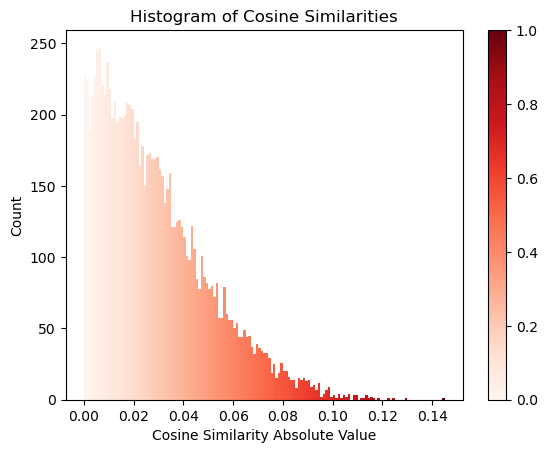

In [1]:
import torch
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

# 向量A
torch.manual_seed(42)
vector_A = torch.randn(768)

# 矩阵B，由1000个768维向量组成
matrix_B = torch.randn(10000, 768)

# 计算余弦相似度
cosine_similarities = torch.cosine_similarity(vector_A.unsqueeze(0), matrix_B, dim=1)
abs_cosine_similarities = torch.abs(cosine_similarities)

# 设置横坐标范围和间隔
start = 0.0
end = abs_cosine_similarities.max().item()
interval = 0.001

# 统计每个范围内的向量数量和余弦相似度的平均值
counts = []
means = []
bins = []

for i in range(int((end - start) / interval) + 1):
    lower = start + i * interval
    upper = start + (i + 1) * interval
    count = torch.sum((abs_cosine_similarities >= lower) & (abs_cosine_similarities < upper)).item()
    mean = torch.mean(cosine_similarities[(abs_cosine_similarities >= lower) & (abs_cosine_similarities < upper)].abs()).item()/end
    counts.append(count)
    means.append(mean)
    bins.append(lower)

# 创建颜色映射
cmap = plt.cm.get_cmap('Reds')

# 根据余弦相似度的平均值设置颜色
colors = [cmap(mean) for mean in means]

# 绘制条形图
plt.bar(bins, counts, width=interval, align='edge', color=colors)
plt.xlabel('Cosine Similarity Absolute Value')
plt.ylabel('Count')
plt.title('Histogram of Cosine Similarities')
plt.colorbar(ScalarMappable(cmap=cmap))
plt.show()


In [13]:
import numpy as np
weight = [means[i]*counts[i]*end for i in range(len(means))]
for i in range(len(weight)):
    # if weight[i] == float("nan"):
    if np.isnan(weight[i]):

        weight[i] = 0
weight

[0.1108287381066475,
 0.3379482440650463,
 0.47040991578251123,
 0.7421641547698526,
 1.0139934131875634,
 1.3535442324355245,
 1.5977940345183015,
 1.6519890711642804,
 1.815341891720891,
 2.2411753674969077,
 2.293324269354343,
 2.277097737416625,
 2.6139373080804944,
 2.6258958969265227,
 2.8804449541494246,
 3.077275536954403,
 3.28130897320807,
 3.635339230298996,
 3.8226307779550552,
 3.9811903908848767,
 3.757200373336673,
 4.183299522846937,
 3.6953486874699593,
 4.182031065225601,
 3.673309274017811,
 4.386942781507969,
 4.584699088707566,
 4.644473927095532,
 4.815934330224991,
 5.020392574369907,
 4.933755375444889,
 4.938876420259476,
 4.486869066953659,
 4.957536444067955,
 5.484065260738135,
 4.295465432107449,
 4.417533077299595,
 4.696020856499671,
 4.851945787668228,
 4.777509663254022,
 4.618582807481289,
 4.194815769791603,
 4.165619947016239,
 5.311587877571584,
 4.716750122606754,
 3.8669138029217724,
 3.626981198787689,
 4.794883843511343,
 4.168728344142437,
 4.0

In [20]:
total_sum = sum(weight)  # 计算整个列表的总和
target_sum = 0.2 * total_sum  # 计算目标和，即总和的80%

current_sum = 0  # 当前累加和
index = -1  # 目标索引

for i, num in enumerate(weight):
    current_sum += num

    if current_sum >= target_sum:
        index = i
        break

In [21]:
index

23

0.14475861191749573

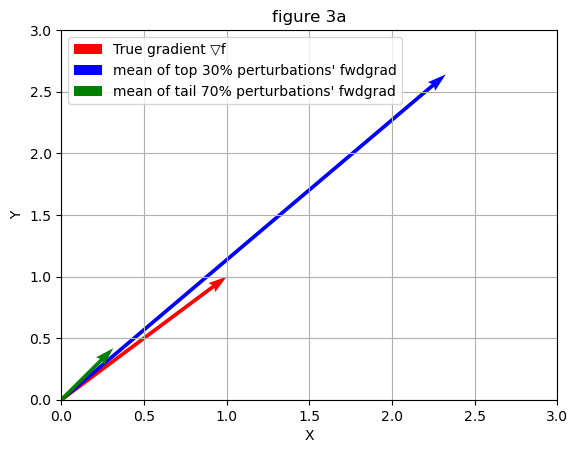

In [510]:
import torch
import matplotlib.pyplot as plt

torch.manual_seed(42)

# 生成示例数据
A = torch.tensor([1, 1])  # 2维向量A
for _ in range(10):
    B = torch.randn(100, 2)  # 由10个2维向量组成的矩阵B

# 计算每个向量与向量A的点积之和
dot_products = torch.sum(B * A, dim=1).abs()

# 对矩阵B中的向量按点积之和排序
sorted_indices = torch.argsort(dot_products, descending=True)
sorted_B = B[sorted_indices]

num_vectors = sorted_B.shape[0]
ten_percent = int(0.3 * num_vectors)

# 划分为前10%的部分和后10%的部分
B1 = sorted_B[:ten_percent]
B2 = sorted_B[ten_percent:]



# 计算矩阵C
C1 = B1*((B1 * A.unsqueeze(0)).sum(dim=1)).unsqueeze(1)

# 计算向量D
D1 = torch.mean(C1, dim=0)

# 计算矩阵C
C2 = B2*((B2 * A.unsqueeze(0)).sum(dim=1)).unsqueeze(1)

# 计算向量D
D2 = torch.mean(C2, dim=0)

# 绘制向量A
plt.quiver(0, 0, A[0], A[1], angles='xy', scale_units='xy', scale=1, color='r', label='True gradient ▽f')


# 绘制向量D
plt.quiver(0, 0, D1[0], D1[1], angles='xy', scale_units='xy', scale=1, color='blue', label="mean of top 30% perturbations' fwdgrad")
# 绘制向量D
plt.quiver(0, 0, D2[0], D2[1], angles='xy', scale_units='xy', scale=1, color='green', label="mean of tail 70% perturbations' fwdgrad")

plt.xlim(0, 3)
plt.ylim(0, 3)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('figure 3a')
plt.legend(loc=2)
plt.grid(True)
plt.show()



In [335]:
torch.sum(sorted_B * A, dim=1)

tensor([ 4.2022e+00,  3.5786e+00,  3.4866e+00,  3.4589e+00,  3.4007e+00,
         3.2676e+00,  3.2415e+00,  3.2112e+00,  3.1528e+00,  3.0601e+00,
         3.0384e+00,  3.0338e+00,  3.0318e+00,  3.0220e+00,  3.0175e+00,
         2.9956e+00,  2.9231e+00,  2.9172e+00,  2.8578e+00,  2.8340e+00,
         2.8287e+00,  2.8223e+00,  2.7648e+00,  2.7641e+00,  2.7028e+00,
         2.6983e+00,  2.6934e+00,  2.6533e+00,  2.6459e+00,  2.6395e+00,
         2.6250e+00,  2.6026e+00,  2.5987e+00,  2.5956e+00,  2.5576e+00,
         2.5185e+00,  2.5119e+00,  2.5112e+00,  2.5097e+00,  2.4889e+00,
         2.4875e+00,  2.4675e+00,  2.4503e+00,  2.4498e+00,  2.4478e+00,
         2.4441e+00,  2.4401e+00,  2.4323e+00,  2.4301e+00,  2.4159e+00,
         2.4141e+00,  2.4094e+00,  2.3695e+00,  2.3517e+00,  2.3326e+00,
         2.3037e+00,  2.3036e+00,  2.3001e+00,  2.2892e+00,  2.2754e+00,
         2.2490e+00,  2.2485e+00,  2.1978e+00,  2.1967e+00,  2.1947e+00,
         2.1757e+00,  2.1757e+00,  2.1498e+00,  2.1

In [315]:
(B * A.unsqueeze(0)).sum(dim=1)

tensor([ 0.4040, -1.3800,  1.2542, -2.2520, -1.7775,  1.0647,  2.1607,  1.4753])

In [319]:
B,A

(tensor([[ 0.9667, -0.5627],
         [ 0.1622, -1.5422],
         [ 1.4436, -0.1894],
         [-1.3098, -0.9422],
         [-1.7434, -0.0341],
         [ 0.6153,  0.4494],
         [ 0.7127,  1.4480],
         [-0.5552,  2.0305]]),
 tensor([1, 1]))

In [318]:
B*A

tensor([[ 0.9667, -0.5627],
        [ 0.1622, -1.5422],
        [ 1.4436, -0.1894],
        [-1.3098, -0.9422],
        [-1.7434, -0.0341],
        [ 0.6153,  0.4494],
        [ 0.7127,  1.4480],
        [-0.5552,  2.0305]])

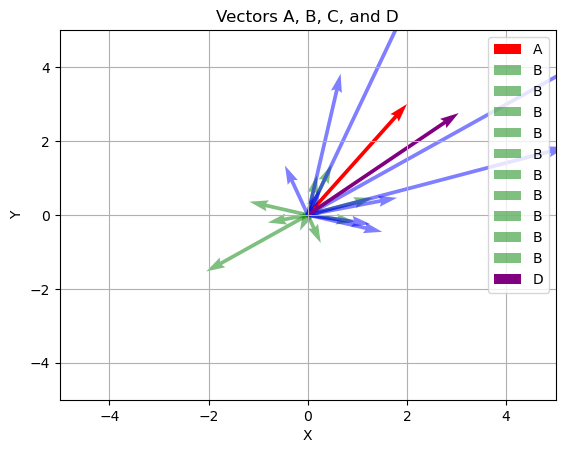

In [138]:
import torch
import matplotlib.pyplot as plt

# 生成示例数据
A = torch.tensor([2.0, 3.0])  # 2维向量A
B = torch.randn(10, 2)  # 由10个2维向量组成的矩阵B

# 计算矩阵C
C = B*((B * A.unsqueeze(0)).sum(dim=1)).unsqueeze(1)
# 计算向量D
D = torch.mean(C, dim=0)

# 绘制向量A
plt.quiver(0, 0, A[0], A[1], angles='xy', scale_units='xy', scale=1, color='r', label='A')

# 绘制矩阵B中的每个向量
for b in B:
    label = 'B' if i == 0 else '_nolegend_'
    plt.quiver(0, 0, b[0], b[1], angles='xy', scale_units='xy', scale=1, color='g', alpha=0.5, label=label)

# 绘制矩阵C中的每个向量
for c in C:
    plt.quiver(0, 0, c[0], c[1], angles='xy', scale_units='xy', scale=1, color='b', alpha=0.5)

# 绘制向量D
plt.quiver(0, 0, D[0], D[1], angles='xy', scale_units='xy', scale=1, color='purple', label='D')

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Vectors A, B, C, and D')
plt.legend()
plt.grid(True)
plt.show()


In [127]:
B*((B * A.unsqueeze(0)).sum(dim=1)).unsqueeze(1)

tensor([[ 6.5789,  5.0779],
        [-1.0852,  2.5367],
        [-0.2427,  0.3453],
        [ 1.9871,  4.1703],
        [-0.1177,  0.2271],
        [ 0.1243, -0.0608],
        [ 0.0440, -0.0079],
        [-0.1530,  0.5230],
        [ 0.2185,  0.2791],
        [ 0.1461, -0.1130]])

In [51]:
torch.randn( 2)*((torch.tensor([2.0, 3.0])  *torch.randn( 2) ).mean())

tensor([-4.5204, -2.9081])

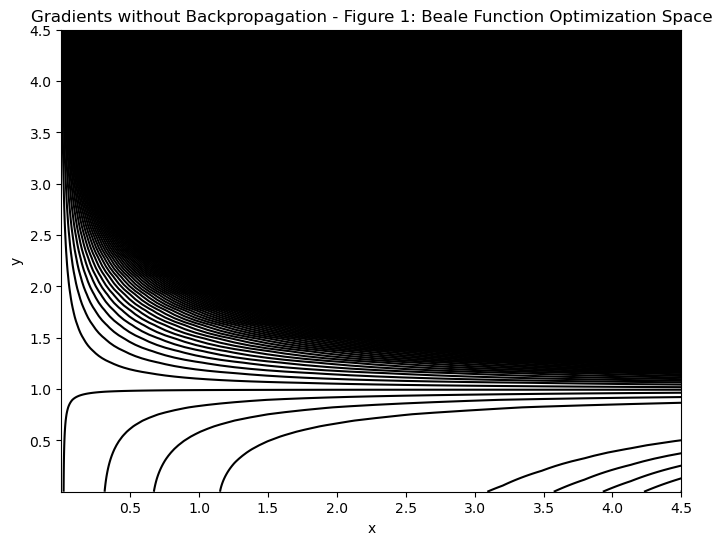

In [161]:
import numpy as np
import matplotlib.pyplot as plt

# 定义 Beale 函数
def beale_function(x, y):
    term1 = (1.5 - x + x * y) ** 2
    term2 = (2.25 - x + x * (y ** 2)) ** 2
    term3 = (2.625 - x + x * (y ** 3)) ** 2
    return term1 + term2 + term3

# 生成 x, y 值
x = np.geomspace(0.001, 4.5, 100)
y = np.geomspace(0.001, 4.5, 100)
X, Y = np.meshgrid(x, y)

# 计算 Z 值（Beale 函数值）
Z = beale_function(X, Y)

# 设置等高线间距
levels = np.linspace(np.min(Z), np.max(Z), 50000)

# 绘制等高线图
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=levels, colors='black')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradients without Backpropagation - Figure 1: Beale Function Optimization Space')

plt.show()


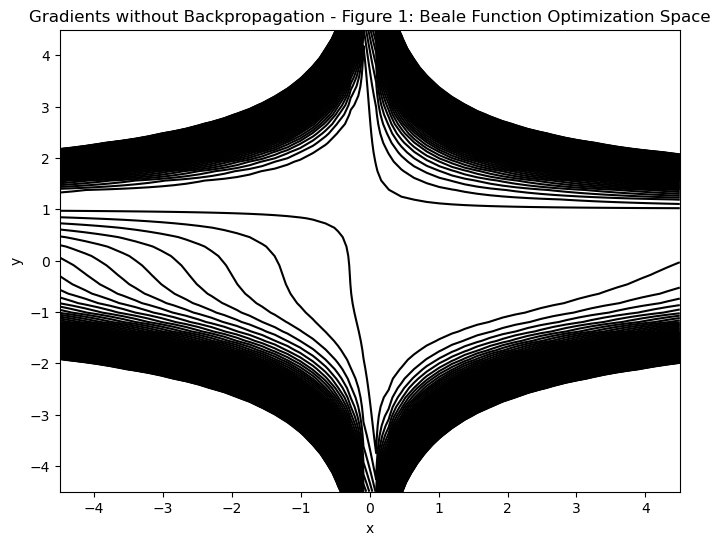

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 定义 Beale 函数
def beale_function(x, y):
    term1 = (1.5 - x + x * y) ** 2
    term2 = (2.25 - x + x * (y ** 2)) ** 2
    term3 = (2.625 - x + x * (y ** 3)) ** 2
    return term1 + term2 + term3

# 生成 x, y 值
x = np.linspace(-4.5, 4.5, 50)
y = np.linspace(-4.5, 4.5, 50)
X, Y = np.meshgrid(x, y)

# 计算 Z 值（Beale 函数值）
Z = beale_function(X, Y)

# 设置等高线间距
levels = np.linspace(np.min(Z), np.max(Z)/100, 100)

# 绘制等高线图
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=levels, colors='black')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradients without Backpropagation - Figure 1: Beale Function Optimization Space')

plt.show()


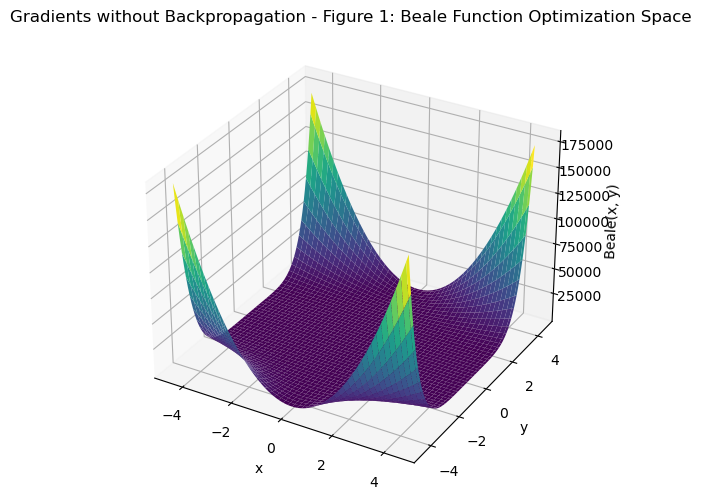

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义 Beale 函数
def beale_function(x, y):
    term1 = (1.5 - x + x * y) ** 2
    term2 = (2.25 - x + x * (y ** 2)) ** 2
    term3 = (2.625 - x + x * (y ** 3)) ** 2
    return term1 + term2 + term3

# 生成 x, y 值
x = np.linspace(-4.5, 4.5, 100)
y = np.linspace(-4.5, 4.5, 100)
X, Y = np.meshgrid(x, y)

# 计算 Z 值（Beale 函数值）
Z = beale_function(X, Y)

# 绘制优化空间图
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Beale(x, y)')
ax.set_title('Gradients without Backpropagation - Figure 1: Beale Function Optimization Space')

plt.show()
